In [1]:
#load in our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in our data
airbnb = pd.read_csv("dataset/listings.csv")

In [3]:
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [4]:
airbnb["price"].mean()

249.16526273565984

In [19]:
#np.random.seed(100)
airbnb.sample(n=40)["price"].mean()

269.6

In [20]:
sample_list = []

for i in range(20_000):
    sample = airbnb.sample(n=40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)
samples = pd.concat(sample_list)

In [21]:
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
4747,9.620000e+17,Mount Pleasant,Entire home/apt,3,1.0,2.0,2.0,599,0
3558,7.500000e+17,Grandview-Woodland,Entire home/apt,2,1.0,1.0,0.0,269,0
4464,9.180000e+17,Downtown,Entire home/apt,7,NaN,4.0,NaN,428,0
3096,6.500000e+17,Downtown,Entire home/apt,5,2.0,2.0,3.0,229,0
3663,7.730000e+17,West End,Private room,2,NaN,2.0,NaN,280,0
...,...,...,...,...,...,...,...,...,...
4094,8.650000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,340,19999
3746,7.890000e+17,Downtown,Entire home/apt,4,1.0,1.0,0.0,290,19999
1104,2.523431e+07,Downtown,Entire home/apt,2,1.0,1.0,2.0,121,19999
4366,9.060000e+17,Sunset,Private room,2,1.0,1.0,2.0,399,19999


In [22]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name="sample_mean")

In [23]:
sample_estimates

,replicate,sample_mean
0,0,247.350
1,1,259.775
2,2,242.275
3,3,243.075
4,4,210.900
...,...,...
19995,19995,249.350
19996,19996,217.150
19997,19997,243.950
19998,19998,258.675


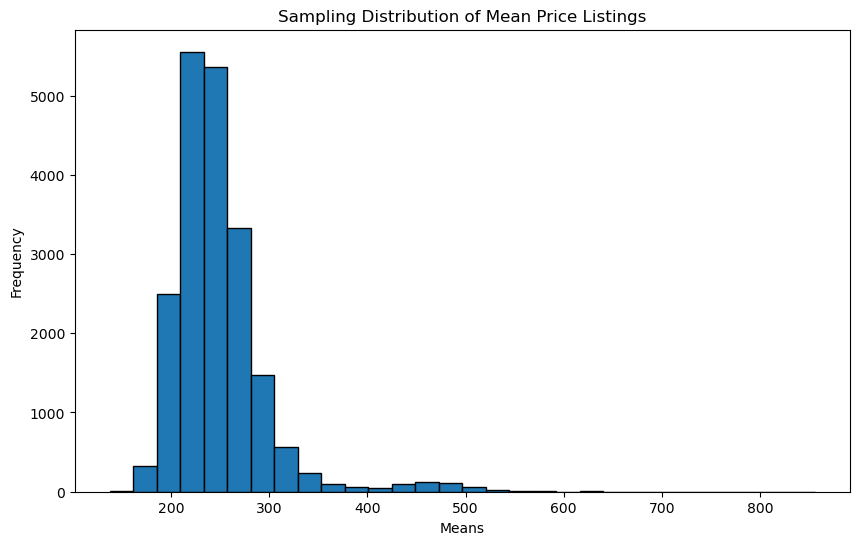

In [24]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [45]:
np.random.seed(1234)
one_sample = airbnb.sample(n=100)
one_sample["price"].mean()

235.91

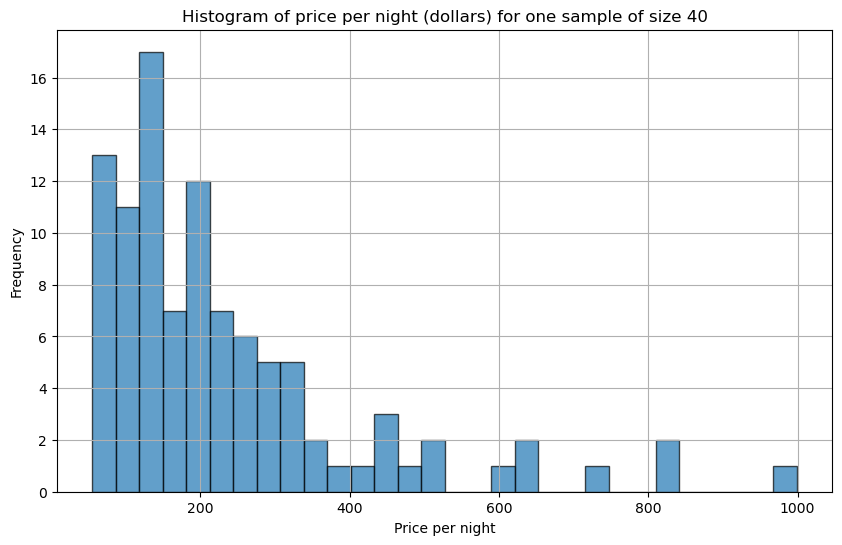

In [46]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [47]:
boot1 = one_sample.sample(frac = 1, replace = True)

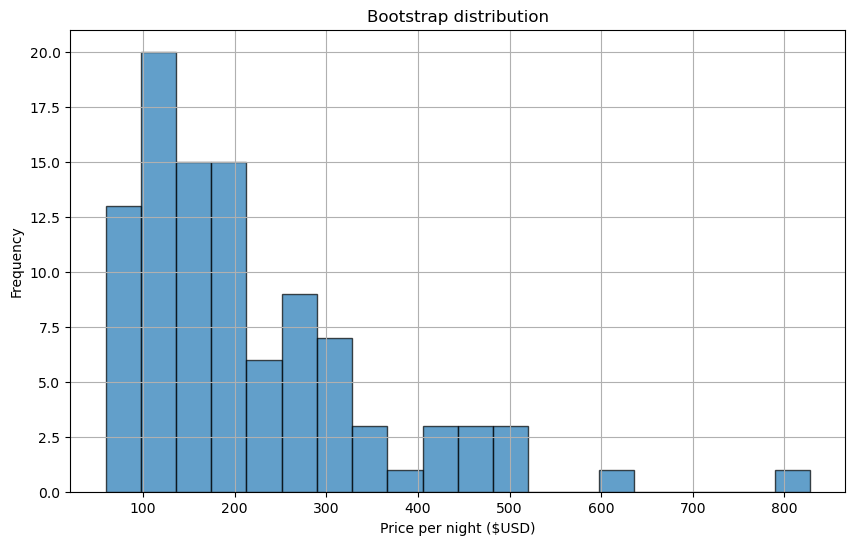

In [48]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [49]:
boot1["price"].mean()

212.66

In [50]:
bootstrap_samples = []

for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace= True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)
boot2000 = pd.concat(bootstrap_samples)

In [51]:
boot_means = boot2000.groupby("replicate")["price"].mean().reset_index(name="mean_price")
boot_means

,replicate,mean_price
0,0,211.42
1,1,218.41
2,2,228.28
3,3,238.09
4,4,238.57
...,...,...
19995,19995,221.36
19996,19996,232.29
19997,19997,209.26
19998,19998,215.81


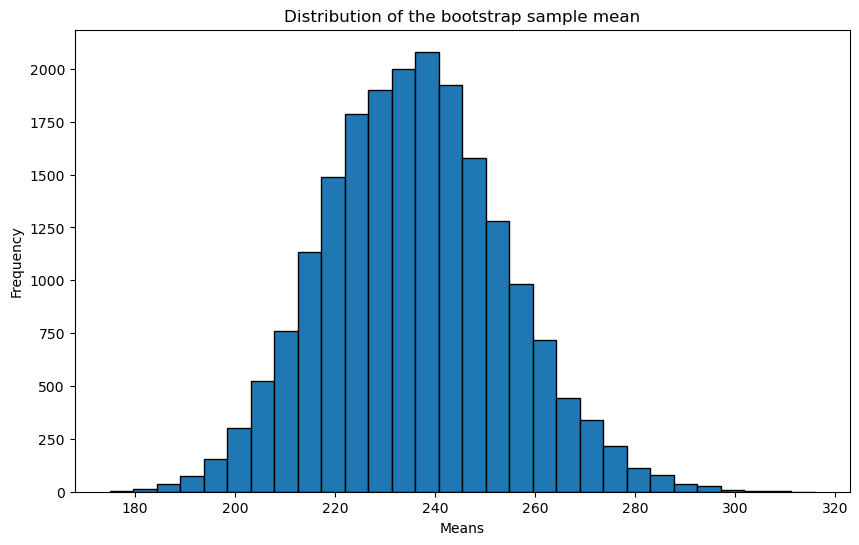

In [52]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [53]:
ci_bounds = boot_means["mean_price"].quantile([0.025,0.975])
ci_bounds

0.025    202.1795
0.975    273.2210
Name: mean_price, dtype: float64